In [1]:
import pandas as pd
import numpy as np
import glob
import re
import networkx as nx
from collections import defaultdict
import itertools
import matplotlib.pyplot as plt
import json

In [3]:
%load_ext autoreload
%autoreload 2
import collection as c
import build_graph as bg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def main(smali_src, test_size, **kwargs):
    # initalize data
    smali = c.get_smali(smali_src)
    test = smali[:test_size]
    
#     calls = list()

    for f in test:
        blocks = defaultdict(list)
        same_block = defaultdict(list)
        
        with open(f) as file:
            # record all api calls
#             bg.find_api_calls(file, calls)
#             file.seek(0)
            
            # build B
            bg.locate_method_blocks(file, blocks)
            for b in blocks:
                apis = []
                bg.find_api_calls(blocks[b], apis)
                same_block[b] = apis
            bg.create_edges(same_block, B)
            
            file.seek(0)
            # build P
            for line in file:
                if('invoke-' in line and 'method' not in line):
                    package = bg.find_package(line)
                    method = bg.find_method(line)
                    packageD[package].append(method)
                    
                    api = []
                    bg.find_api_calls([line], api)
                    invoke = bg.find_invoke(line)
                    invokeD[invoke].append(api[0])

B = nx.Graph()
P = nx.Graph()
I = nx.Graph()

packageD = defaultdict(list)
invokeD = {'direct': [], 'virtual':[], 'static':[], 'super':[],'interface':[]}

cfg = json.load(open('config.json'))
main(**cfg)
bg.create_edges(packageD, P)
bg.create_edges(packageD, I)

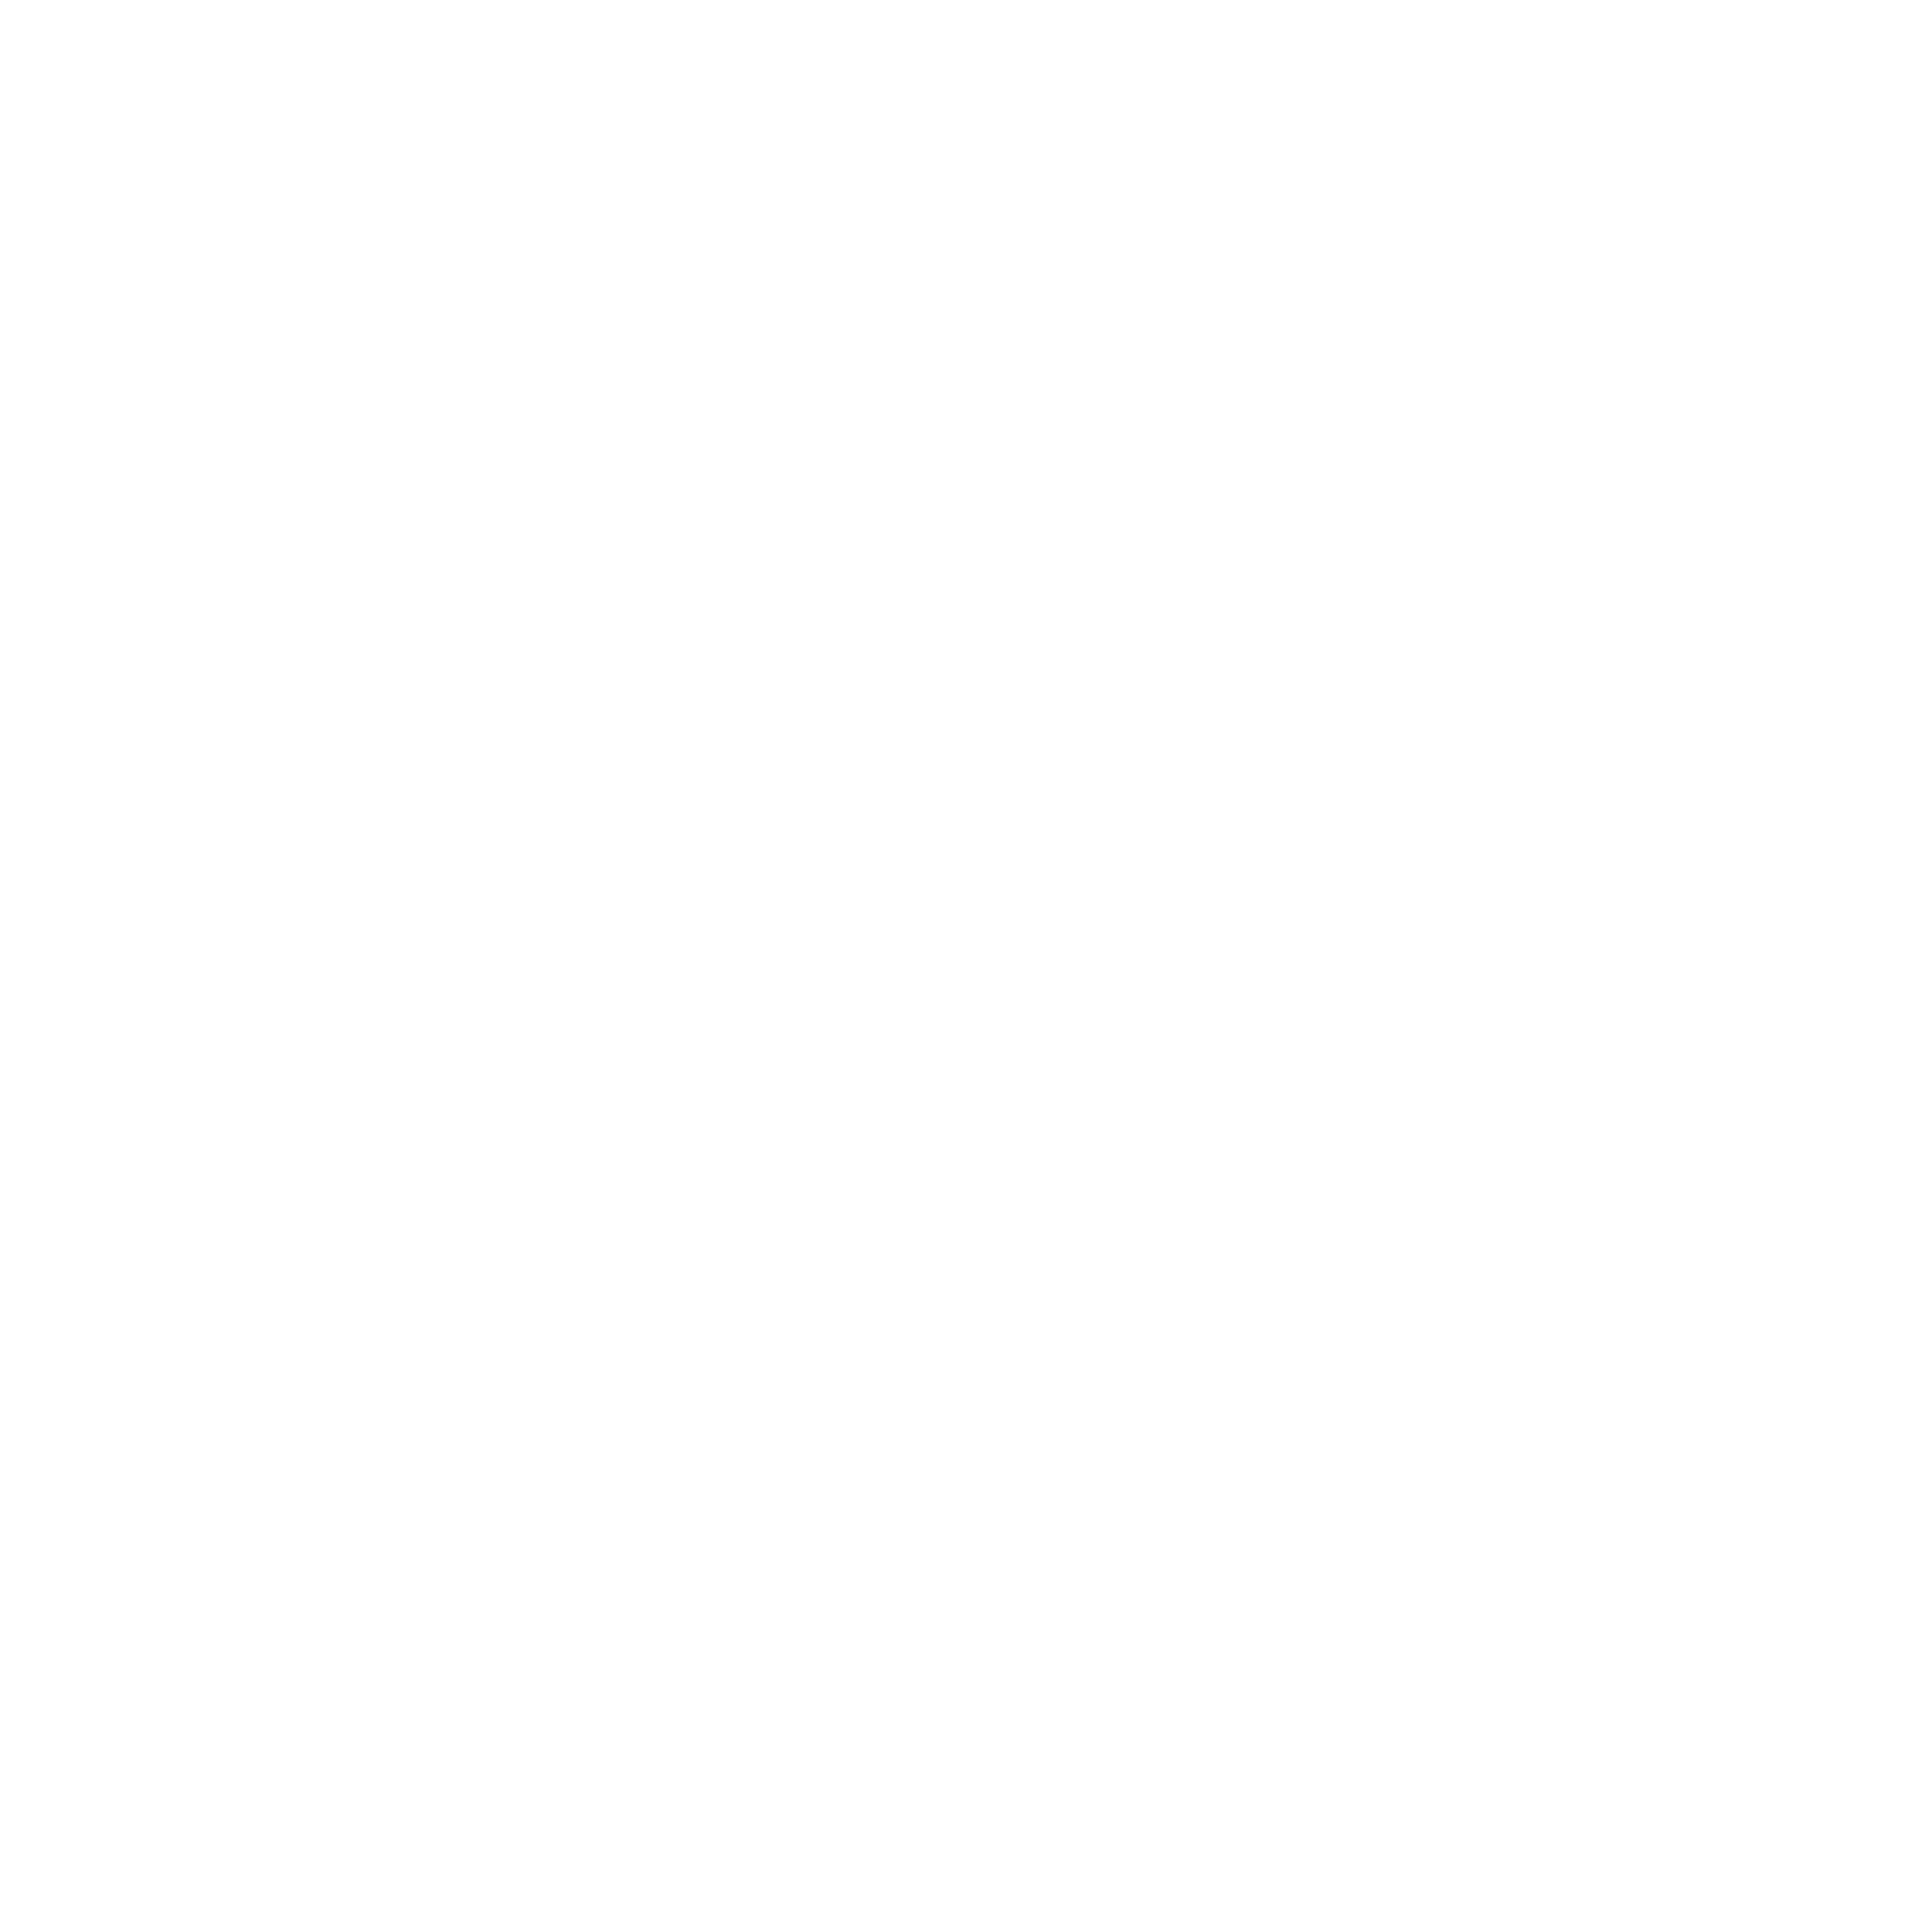

In [5]:
plt.figure(figsize=(30,30))
nx.draw(B, node_size=30)